# Decision Tree
One of the most common and effective machine learning algorithms that I have acquired knowledge of is called a Decision Tree. It is a method of non-parametric supervised learning that can be used for classification as well as regression work. The purpose of this project is to develop a model capable of predicting the value of a target variable through the discovery and application of straightforward decision rules inferred from the characteristics of the data. In a classification model, the target values are represented by discrete values due to the nature of the model, but in a regression model, the goal values are represented by continuous values due to the nature of the model. Decision Trees, in contrast to "black box" types of algorithms like Neural Networks, are relatively simpler to comprehend due to the fact that they expose their basic reasoning for generating decisions (you will find details in the following session).

In spite of the fact that many data scientists consider it to be an outdated approach, and they might have some reservations about its precision as a result of an overfitting issue, the more recent tree-based models, such as Random forest (bagging method), gradient boosting (boosting method), and XGBoost (boosting method), are built on top of decision tree algorithm. Therefore, it is highly recommended that you familiarize yourself with the ideas and procedures that underpin decision trees!



There are four common varieties of decision tree algorithms, which are as follows:

1. ID3 - Iterative Dichotomiser
2. CART (Classification And Regression Trees)
3. Chi-Square
4. Reduction in Variance

## ID3 (Iterative Dichotomiser)
The ID3 decision tree algorithm determines the splitting points based on the Information Gain variable. We may use entropy to calculate the degree to which a sample is homogenous, which will then allow us to determine the amount of information that we have gained.


In [153]:
import numpy as np
import pandas as pd


In [154]:
df = pd.read_csv("../dataset/dataset_with_error.csv")

df

,Unnamed: 0,Point A,Point B,Point C,Point D,Point E,Error Classification
0,0,1.373475,0.958978,0.836790,1.502963,0.978804,A
1,1,1.940213,1.371291,1.743612,1.315589,2.017418,B
2,2,1.690368,2.025028,2.025214,1.518278,1.934396,A
3,3,1.542669,1.888478,1.641450,1.641526,2.550871,B
4,4,1.429971,1.580948,1.820888,1.274735,1.757213,A
...,...,...,...,...,...,...,...
306,306,0.234889,0.341797,0.312052,0.323540,0.359836,E
307,307,0.235683,0.339810,0.340483,0.328003,0.329723,E
308,308,0.231840,0.313921,0.329652,0.349243,0.341359,E
309,309,0.237851,0.306959,0.316966,0.357427,0.358833,E


In [155]:
df = df.drop('Unnamed: 0', axis=1)
df

,Point A,Point B,Point C,Point D,Point E,Error Classification
0,1.373475,0.958978,0.836790,1.502963,0.978804,A
1,1.940213,1.371291,1.743612,1.315589,2.017418,B
2,1.690368,2.025028,2.025214,1.518278,1.934396,A
3,1.542669,1.888478,1.641450,1.641526,2.550871,B
4,1.429971,1.580948,1.820888,1.274735,1.757213,A
...,...,...,...,...,...,...
306,0.234889,0.341797,0.312052,0.323540,0.359836,E
307,0.235683,0.339810,0.340483,0.328003,0.329723,E
308,0.231840,0.313921,0.329652,0.349243,0.341359,E
309,0.237851,0.306959,0.316966,0.357427,0.358833,E


In [156]:
df.dtypes

Point A                 float64
Point B                 float64
Point C                 float64
Point D                 float64
Point E                 float64
Error Classification     object
dtype: object

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Point A               311 non-null    float64
 1   Point B               311 non-null    float64
 2   Point C               311 non-null    float64
 3   Point D               311 non-null    float64
 4   Point E               311 non-null    float64
 5   Error Classification  311 non-null    object 
dtypes: float64(5), object(1)
memory usage: 14.7+ KB


In [158]:
# Converting categorical variables into dummies/indicator variables

# df_getdummy=pd.get_dummies(data=df, columns=['Point A', 'Point B', 'Point C', 'Point D','Point E'])
# df_getdummy

In [159]:
# Separating the training set and test set

from sklearn.model_selection import train_test_split

X = df.drop('Error Classification',axis=1)

y = df['Error Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


In [160]:

# importing Decision Tree Classifier via sklean

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)


In [161]:
y_pred

array(['E', 'C', 'E', 'C', 'D', 'C', 'C', 'D', 'E', 'C', 'D', 'C', 'E',
       'D', 'C', 'D', 'D', 'C', 'E', 'D', 'C', 'D', 'E', 'E', 'C', 'C',
       'E', 'C', 'C', 'E', 'E', 'C', 'E', 'D', 'D', 'C', 'E', 'C', 'D',
       'D', 'D', 'E', 'D', 'C', 'E', 'E', 'C', 'C', 'C', 'D', 'D', 'D',
       'C', 'D', 'E', 'C', 'D', 'D', 'D', 'C', 'C', 'C', 'D', 'C', 'E',
       'D', 'D', 'E', 'C', 'E', 'C', 'D', 'D', 'D', 'C', 'D', 'E', 'E',
       'D', 'E', 'E', 'E', 'D', 'E', 'C', 'D', 'E', 'C', 'C', 'E', 'C',
       'E', 'C', 'D'], dtype=object)

In [162]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)

In [163]:
score

0.776595744680851

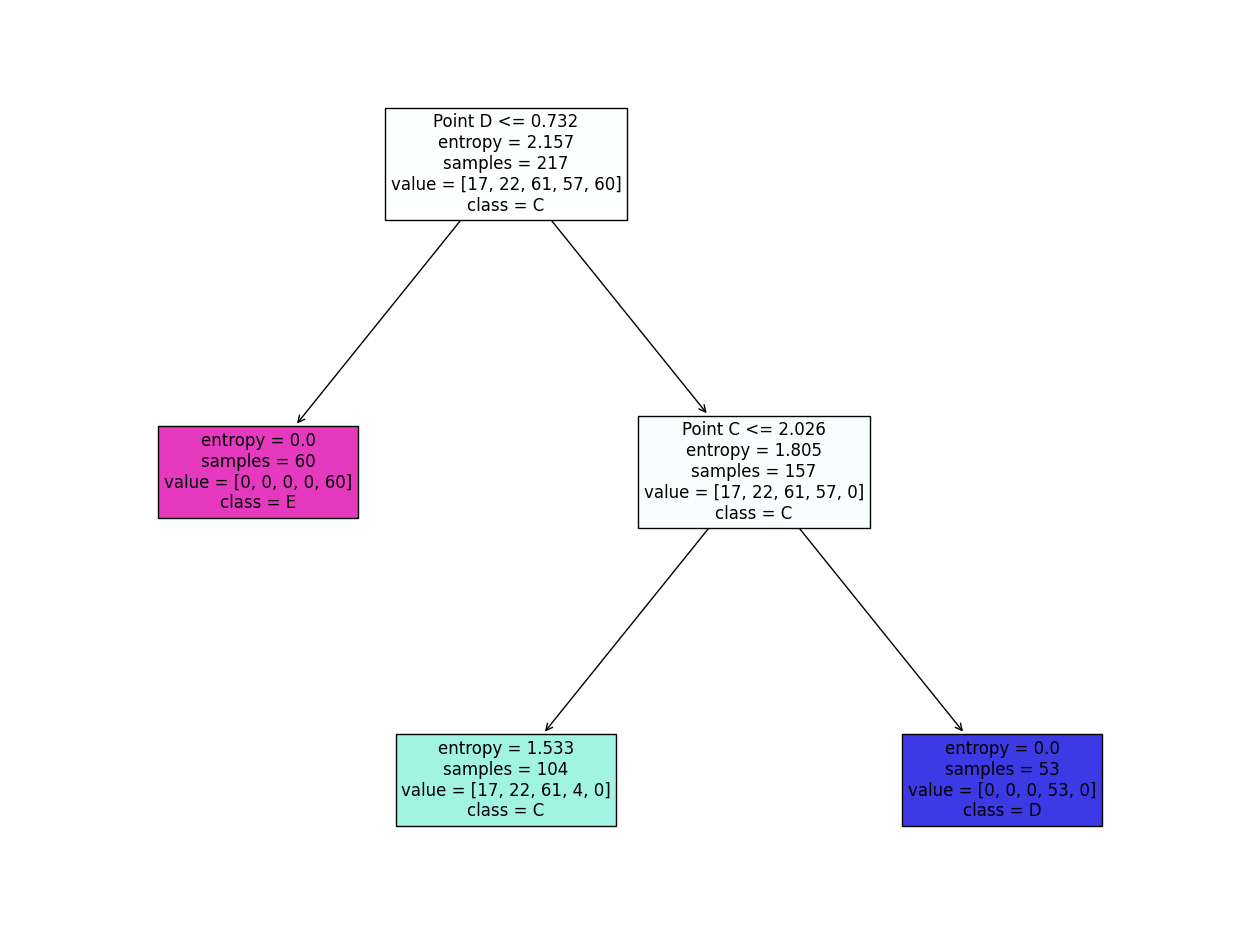

In [164]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=df.columns, fontsize=12, filled=True, 
              class_names=['A', 'B','C','D','E'])

Overfitting is the primary drawback of using decision trees, and this is especially problematic when a tree has a particularly deep level. Fortunately, the more recent tree-based models, such as random forest and XGBoost, were built on top of the decision tree algorithm. These models, which generally perform better with a robust modeling technique and are much more dynamic than a single decision tree, were constructed more recently. Because of this, having a solid foundation in data science and machine learning begins with having a solid understanding of the principles and techniques that lie underlying Decision Trees.

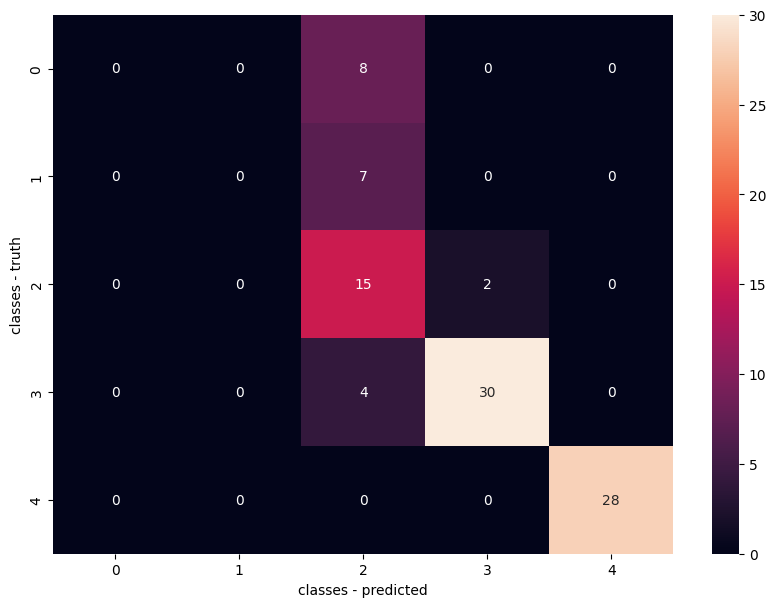

In [165]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('classes - predicted')
plt.ylabel('classes - truth')
plt.show()

# Hyperparameter Optimization

In order to do this, we first need to decide which hyperparameters to test. Let’s see which ones we will be using:

1. criterion – the function that’s used to determine the quality of a split
2. max_depth – the maximum depth of the tree
3. max_features – the max number of features to consider when making a split
4. splitter – the strategy used to choose the split at each node


In [166]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.6, 'splitter': 'best'}


In [167]:
clf = DecisionTreeClassifier(max_depth=4, criterion='entropy', max_features=0.6, splitter='best')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8297872340425532


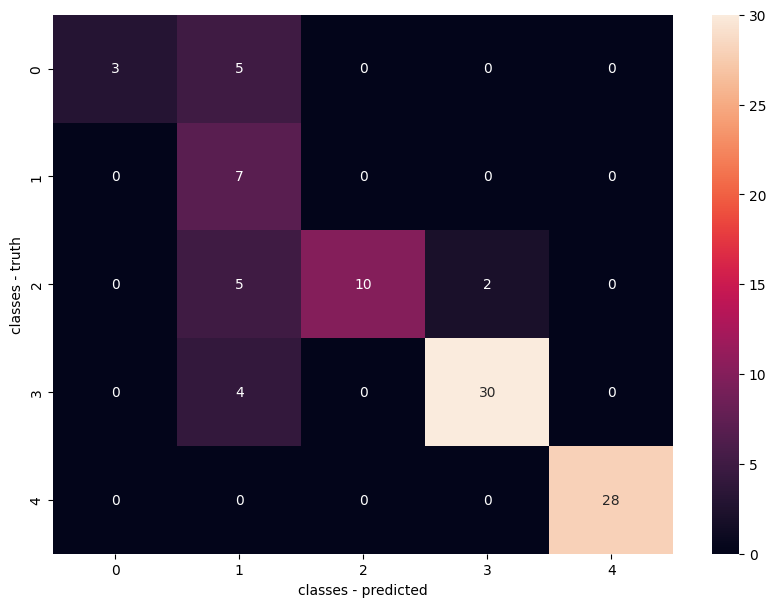

In [168]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel('classes - predicted')
plt.ylabel('classes - truth')
plt.show()

## Accuracy 

In [169]:
clf = DecisionTreeClassifier(max_depth=4, criterion='entropy', max_features=0.6, splitter='best')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy is: ",accuracy_score(y_test, y_pred)*100)

Accuracy is:  90.42553191489363


## Precision

In [170]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average="weighted")
print('Precision: ',precision)

Precision:  0.9274754500818331


## Recall

In [171]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average="weighted")
print('Recall: ',recall)

Recall:  0.9042553191489362


## F1 Score

In [175]:
from sklearn.metrics import f1_score
f1_score = 2 * (precision * recall ) / (precision + recall)
print('F1 Score: ',f1_score)


F1 Score:  0.9157182083792266


## Predictions from validations set



In [173]:
dfn = pd.read_csv("../dataset/validation_ds.csv")
df2 = pd.read_csv("../dataset/validation_ds.csv")
df2 = df2.drop('Unnamed: 0', axis=1)
df2 = df2.drop('Error Classification', axis=1)
df2_pred = dtree.predict(df2)
df2_pred


array(['C', 'C', 'C', 'C', 'E'], dtype=object)

In [174]:
score = accuracy_score(dfn['Error Classification'], df2_pred)
score

0.4